In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from glob import iglob
from math import log, floor
import os
import re
import pickle

%reload_ext autoreload
%autoreload 2

from lib.plot_utils import *
from lib.cdf_utils import *
from lib.scatter_utils import *

## Scatter Plot of Total Flow

In [2]:
def pop_random_scatter(path_form_csv, pop_csv, query_str, title):
    with_kdl = "problem == 'Kdl.graphml'"
    no_kdl = "problem != 'Kdl.graphml'"
    ratio_dfs = get_ratio_dataframes(path_form_csv, pop_csv,
        pop_parent_query_str=query_str,
        pop_query_strs=[with_kdl, no_kdl]
    )
    plot_dfs = [ratio_dfs["POP"][with_kdl], ratio_dfs["POP"][no_kdl]]
    scatter_plot(plot_dfs,
            ["KDL", "Non-KDL"],
            ["nc", "smore"],
            "speedup_ratio",
            "obj_val_ratio",
            xlim=None,
            ylim=[0.0, 1.1],
            figsize=(7.5, 4),
            xlabel='Speedup ratio (to original)',
            ylabel='Total flow\nratio (to original)',
            bbta=(0, 0, 1, 2.35),
            ncol=2,
            xlog=True,
            save=True)

In [3]:
path_form_csv = 'max_total_flow_csvs/path-form-total-flow-slices_0_1_2_3_4.csv'
pop_csv = 'max_total_flow_csvs/pop-total_flow-slice_0-k_16.csv'

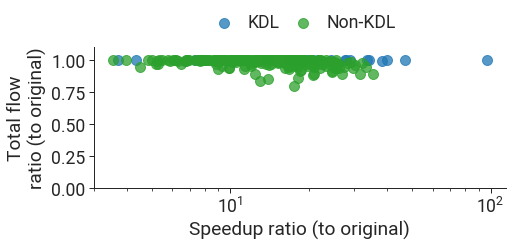

In [4]:
pop_random_scatter(path_form_csv, pop_csv, "split_method == 'random' and num_subproblems == 16 and (tm_model == 'poisson-high-intra' and split_fraction == 0.75) or (tm_model != 'poisson-high-intra' and split_fraction == 0.0)", "Poisson, High Intra")

                                                      num_nodes  num_edges  \
problem           tm_model traffic_seed scale_factor                         
Cogentco.graphml  bimodal  1709348441   1.0                 197        486   
                           1318417115   2.0                 197        486   
                           1123824412   4.0                 197        486   
                           1297305407   8.0                 197        486   
                           1541550360   16.0                197        486   
...                                                         ...        ...   
UsCarrier.graphml uniform  1323869923   8.0                 158        378   
                           1938895536   16.0                158        378   
                           1074581961   32.0                158        378   
                           1031527041   64.0                158        378   
                           1671427951   128.0               158 

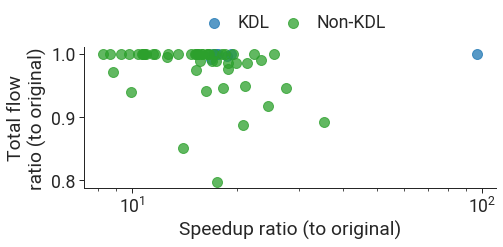

In [6]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'poisson-high-inter'", "Poisson, High Inter")

                                                      num_nodes  num_edges  \
problem           tm_model traffic_seed scale_factor                         
Cogentco.graphml  bimodal  1709348441   1.0                 197        486   
                           1318417115   2.0                 197        486   
                           1123824412   4.0                 197        486   
                           1297305407   8.0                 197        486   
                           1541550360   16.0                197        486   
...                                                         ...        ...   
UsCarrier.graphml uniform  1323869923   8.0                 158        378   
                           1938895536   16.0                158        378   
                           1074581961   32.0                158        378   
                           1031527041   64.0                158        378   
                           1671427951   128.0               158 

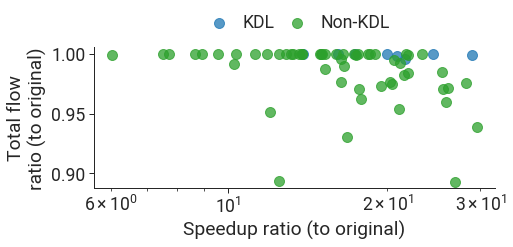

In [7]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'uniform'", "Uniform")

                                                      num_nodes  num_edges  \
problem           tm_model traffic_seed scale_factor                         
Cogentco.graphml  bimodal  1709348441   1.0                 197        486   
                           1318417115   2.0                 197        486   
                           1123824412   4.0                 197        486   
                           1297305407   8.0                 197        486   
                           1541550360   16.0                197        486   
...                                                         ...        ...   
UsCarrier.graphml uniform  1323869923   8.0                 158        378   
                           1938895536   16.0                158        378   
                           1074581961   32.0                158        378   
                           1031527041   64.0                158        378   
                           1671427951   128.0               158 

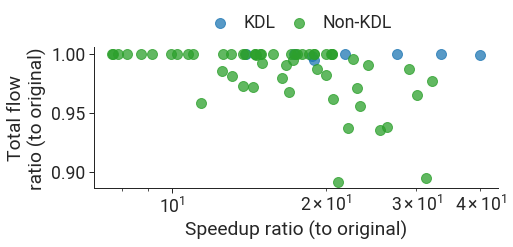

In [8]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'gravity'", "Gravity")

                                                      num_nodes  num_edges  \
problem           tm_model traffic_seed scale_factor                         
Cogentco.graphml  bimodal  1709348441   1.0                 197        486   
                           1318417115   2.0                 197        486   
                           1123824412   4.0                 197        486   
                           1297305407   8.0                 197        486   
                           1541550360   16.0                197        486   
...                                                         ...        ...   
UsCarrier.graphml uniform  1323869923   8.0                 158        378   
                           1938895536   16.0                158        378   
                           1074581961   32.0                158        378   
                           1031527041   64.0                158        378   
                           1671427951   128.0               158 

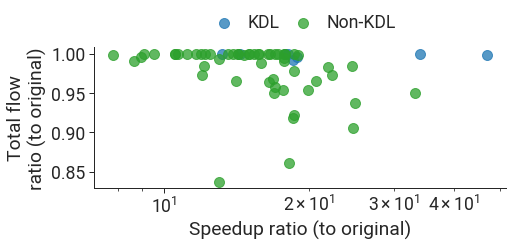

In [9]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'bimodal'", "Bimodal")

                                                      num_nodes  num_edges  \
problem           tm_model traffic_seed scale_factor                         
Cogentco.graphml  bimodal  1709348441   1.0                 197        486   
                           1318417115   2.0                 197        486   
                           1123824412   4.0                 197        486   
                           1297305407   8.0                 197        486   
                           1541550360   16.0                197        486   
...                                                         ...        ...   
UsCarrier.graphml uniform  1323869923   8.0                 158        378   
                           1938895536   16.0                158        378   
                           1074581961   32.0                158        378   
                           1031527041   64.0                158        378   
                           1671427951   128.0               158 

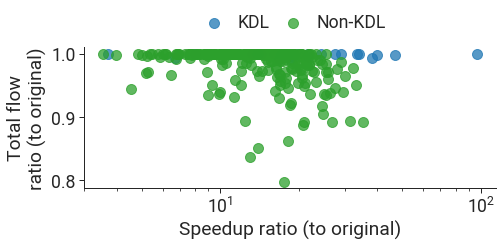

In [10]:
pop_random_scatter(path_form_csv, pop_csv,
                   None, "all")